<a href="https://colab.research.google.com/github/VinZCodz/machine-learning-works/blob/main/multi_variate_linear_regression/multi_variate_linear_regression_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Scikit Learn ML tool kit for Linear Reg.

Resources:
Home: https://scikit-learn.org/stable/index.html

Gradient Descent: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

Z-Score Normalization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



> Note! Please add other files given in the repo, to Files section of this notebook, for all the things to work properly. Those are libraries used to run some routines.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [ ]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### Normalizing


StandardScaler for Z-Score Normalization.

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

### Regression Model and Descent


SGDRegressor(max_iter=1000) for Gradient Descent


In [ ]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

Lets check the final weights and bias with manual findings

In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

Very close match:

> model parameters: w: [110.15 -21.13 -32.54 -38.02], b:[363.13]

> model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16





# Lets Make predictions using sk learn

Predict using both dot product and sk learn lib.

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

Good Predict!



> prediction using np.dot() and sgdr.predict match: True

> Prediction on training set: [295.2  485.73 389.45 491.89]

> Target values [300.  509.8 394.  540. ]



### Final Plot

In [ ]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

### Similiar plots of Muti Variate Linear Reg.

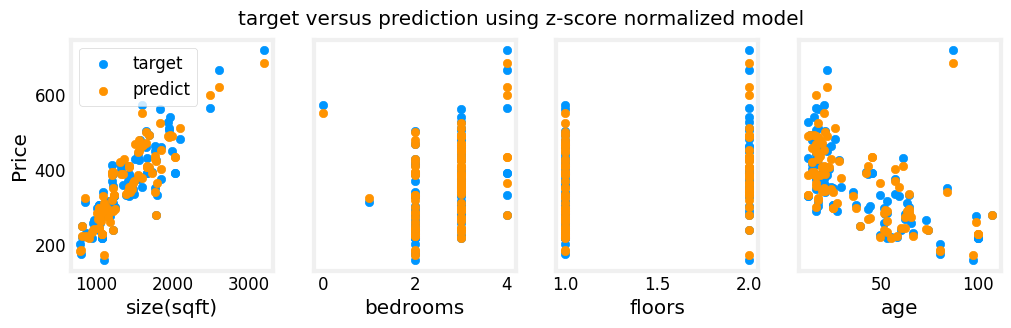